We are required to train a deep learning model on the IMDB reviews dataset and classify a set of new reviews as positive(1) or negative(0) using the trained model.

Steps include:
1. Downloading data from tensorflow dataset.
2. Segregating training and testing sentences & labels.
3. Data preparation to padded sequences
4. Defining out Keras model with an Embedding layer.
5. Train the model and explore the weights from the embedding layer. (Projecting them in TF 3D)
6. Test the model on novel reviews.


In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.7.0


## Downloading the TensorFlow `imdb_review` dataset

> Make sure tensorflow_datasets is installed

In [2]:
##load the imdb reviews dataset
data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True) #with info for meta data and as_supervised for Labels.

## Segregating training and testing sets

In [3]:
##segregate training and test set
train_data, test_data = data['train'], data['test']

##create empty list to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [4]:
##iterate over the train data to extract sentences and labels
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

##iterate over the test set to extract sentences and labels
for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())



In [5]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [6]:
print(train_labels[:5])
print(train_sentences[:5])

[0 0 0 1 1]
["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot dev

## Data preparation - setting up the tokenizer

In [7]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 16
max_length = 120
#trunc_type='post'
oov = "<oov>"


In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length)  #, truncating=trunc_type

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(train_sentences[1])
print(train_padded[1])
print(decode_review(train_padded[1]))

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.
[   0    0    0    0    0    0    0    0   11   26   75  571    6  805
 2354  313  106   19   12    7  629  686    6    4 2219    5  181  584
   64 1454  110 2263    3 3951   21    2    1    3  258   41 4677    4
  174  188   21   12 4078   11 1578 2354   86    2   20   14 1907    2
  112  940   14 1811 1340  548    3  355  181  466    6  591   19   17
   55 1817    5   49   14 4

## Define the Neural Network with Embedding layer

1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Adding a flatten layer, and two dense(fully connected) layers.

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [11]:
num_epochs = 10

##train the model with training and validation set
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
782/782 [==============================] - 6s 6ms/step - loss: 0.4806 - accuracy: 0.7560 - val_loss: 0.3405 - val_accuracy: 0.8498
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2424 - accuracy: 0.9068 - val_loss: 0.3621 - val_accuracy: 0.8428
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1053 - accuracy: 0.9707 - val_loss: 0.4396 - val_accuracy: 0.8301
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0290 - accuracy: 0.9958 - val_loss: 0.5321 - val_accuracy: 0.8251
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.5901 - val_accuracy: 0.8278
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6458 - val_accuracy: 0.8295
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 9.3577e-04 - accuracy: 1.0000 - val_loss: 0.6876 - val_accuracy: 0.8298
Ep

## Projecting embeddings on TensorFlow projector

Write the vectors of an embeddings into a TSV file to visualise it in a 3D space on the [TensorFlow projector](https://projector.tensorflow.org/)


### Deriving weights from the embedding layer

**isolating the first embedding layer L 1  
l1 = model.layers[0]  
  
**extracting learned weights  
weights = l1.get_weights()[0]  
print(weights.shape) # shape: (vocab_size, embedding_dim)  
print(weights[0])  

In [17]:
##isolating the first embedding layer L 1


###Downloading the Vectors & Metadata

**import I/O module in python
import io  
  
**open the text stream for vectors  
vectors = io.open('vectors.tsv', 'w', encoding='utf-8')   
  
**open the text stream for metadata   
meta = io.open('meta.tsv', 'w', encoding='utf-8')  
  
  
**write each word and its corresponding embedding  
for index in range(1, vocab_size):  
  word = reverse_word_index[index]  # flipping the key-value in word_index  
  embeddings = weights[index]  
  meta.write(word + "\n")   
  vectors.write('\t'.join([str(x) for x in embeddings]) + "\n")  
  
**close the stream  
vectors.close()  
meta.close()  

In [13]:
##import I/O module in python import io

##open the text stream for vectors


**download the written files to your local machine
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vectors.tsv')
  files.download('meta.tsv')

In [14]:
##download the written files to your local machine


## Visualizing training and val loss

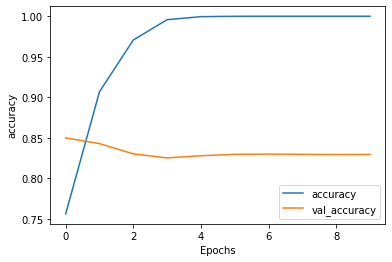

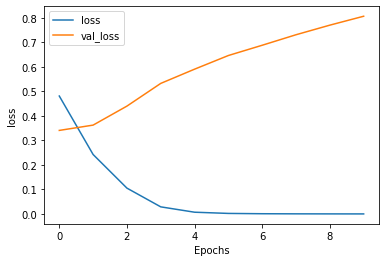

In [15]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.legend([metric, 'val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()
  
##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

In [16]:
sentence = ["The first part of the movie was dull and boring!", "We watched Queen's Gambit, all seven hours of it, in a single sitting. This show is an absolute gem."]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
print(model.predict(padded_seqs))

[[2.061435e-05]
 [9.048178e-01]]


0.00002 for NEGATIVE review and 0.9 for a POSITIVE review.  
Model definitely got these sentences right!  


But, the increasing gap in accuracy and loss, is worrisome. Certain amount of improvement is surely required over and above the embedding and flattening and fully connected dense layers of our NN.